In [1]:
from independent_rejector.prediction import Prediction
from independent_rejector.costs import Costs
from independent_rejector.metric import Metric
from independent_rejector.pdfs import PDFs
from independent_rejector.pdf import PDF
import numpy as np
from typing import List
from matplotlib import pyplot
from tqdm import tqdm

In [2]:
predictions = []
# Add False Negatives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "negative", "positive", p, "positive", None)
    predictions.append(prediction)

# Add False Positives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "positive", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Negatives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "negative", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Positives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "positive", "positive", p, "positive", None)
    predictions.append(prediction)

In [3]:
kde = PDFs.estimator(predictions)
pdf = PDF(predictions, 1.0, kde)
print( pdf.integral(threshold=1.0))
print( pdf.integral(threshold=0.5))
print( pdf.integral(threshold=0.25))
print( pdf.integral(threshold=0.0))

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


0.9787081406337832
0.4893989644185475
0.40427446663252137
0


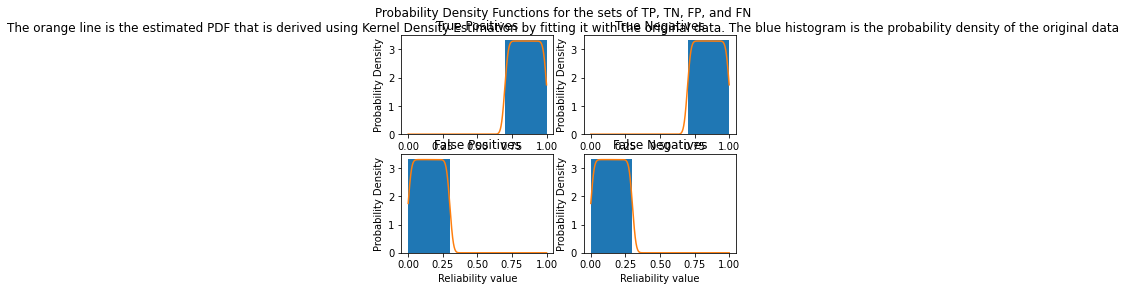

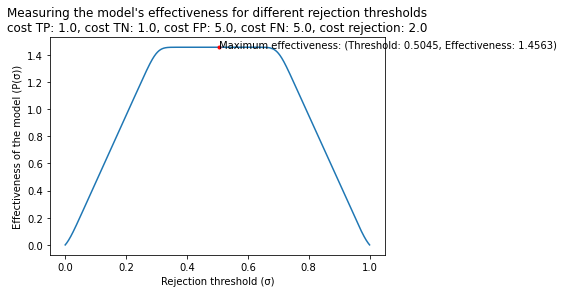

In [4]:
costs = Costs(cost_TP=1.0, cost_TN=1.0, cost_FP=5.0, cost_FN=5.0, cost_rejection=2.0)
metric = Metric(costs, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


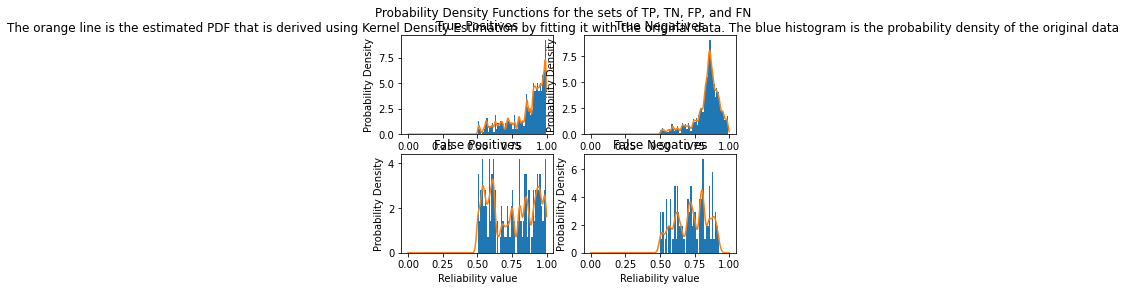

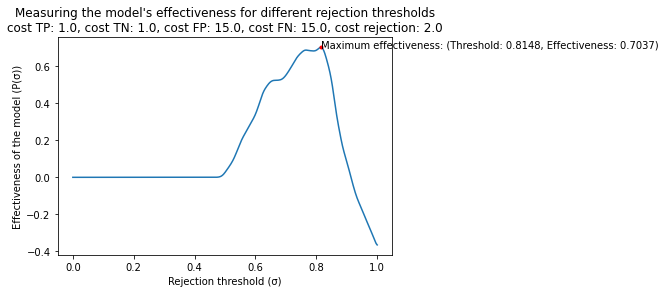

In [6]:
predictions = Prediction.load("input/cnn-hoseem-calibrated.p", gold_class="Hate")
costs = Costs(cost_TP=1.0, cost_TN=1.0, cost_FP=15.0, cost_FN=15.0, cost_rejection=2.0)
metric = Metric(costs, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()